In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

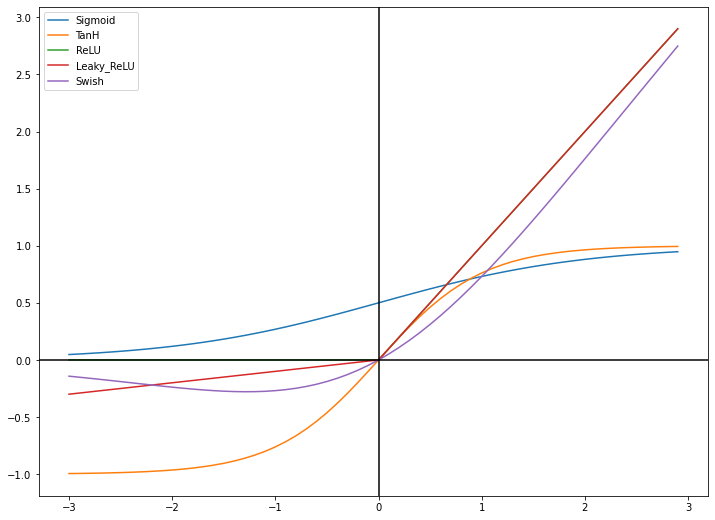

In [2]:
#sigmoid

def sigmoid(x):
    a=[]
    
    for i in x:
        a.append(1/(1+math.exp(-i)))
        
    return a
    
#hiperbolik tanjant

def tanh(x, derivative=False):
    if (derivative==True):
        return (1-(x**2))
    return np.tanh(x)

#ReLU

def re(x):
    b=[]
    
    for i in x:
        if i<0:
            b.append(0)
        else:
            b.append(i)
            
    return b
    
#Leaky ReLU

def lr(x):
    b=[]
    for i in x:
        if i<0:
            b.append(i/10)
            
        else:
            b.append(i)
    return b

#Grafik

x = np.arange(-3., 3., 0.1)

sig=sigmoid(x)
sig = np.array(sig)
tanh = tanh(x)
relu = re(x)
leaky_relu = lr(x)
swish = x*sigmoid(x)

fig = plt.figure(figsize=(12, 9))

line_1,= plt.plot(x,sig, label='Sigmoid')
line_2,=  plt.plot(x,tanh, label='TanH')
line_3,= plt.plot(x,relu, label='ReLU')
line_4,= plt.plot(x,leaky_relu, label='Leaky_ReLU')
line_5,= plt.plot(x,swish, label='Swish')

plt.legend(handles=[line_1, line_2, line_3, line_4, line_5])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

In [3]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K

import tensorflow  as tf
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
batch_size = 128 # Küme Boyutu
num_classes = 10 # Sınıf Sayısı
epochs = 20 # Eğitimin epoch sayısı
w_l2 = 1e-5 # Başlangıç

In [6]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

In [7]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# sınıf vektörlerini ikili sınıf matrislerine dönüştürmek
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
from keras import optimizers, regularizers

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 24, 24, 64)        0

In [10]:
hist_sigmoid=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 35s 74ms/step - loss: 0.5360 - accuracy: 0.8689 - val_loss: 0.2775 - val_accuracy: 0.9529 - lr: 0.0010
Epoch 2/20
469/469 [==============================] - 35s 75ms/step - loss: 0.1936 - accuracy: 0.9531 - val_loss: 0.1134 - val_accuracy: 0.9739 - lr: 0.0010
Epoch 3/20
469/469 [==============================] - 36s 76ms/step - loss: 0.1440 - accuracy: 0.9633 - val_loss: 0.0782 - val_accuracy: 0.9797 - lr: 0.0010
Epoch 4/20
469/469 [==============================] - 36s 77ms/step - loss: 0.1201 - accuracy: 0.9688 - val_loss: 0.1180 - val_accuracy: 0.9684 - lr: 0.0010
Epoch 5/20
469/469 [==============================] - 38s 80ms/step - loss: 0.1051 - accuracy: 0.9740 - val_loss: 0.1089 - val_accuracy: 0.9699 - lr: 0.0010
Epoch 6/20
469/469 [==============================] - 36s 77ms/step - loss: 0.0949 - accuracy: 0.9773 - val_loss: 0.0676 - val_accuracy: 0.9830 - lr: 0.0010
Epoch 7/20
469/469 [==============================] - 36s 

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_3 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 24, 24, 64)       

In [12]:
hist_tanh=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 36s 75ms/step - loss: 0.1877 - accuracy: 0.9454 - val_loss: 0.1560 - val_accuracy: 0.9540 - lr: 0.0010
Epoch 2/20
469/469 [==============================] - 36s 76ms/step - loss: 0.0824 - accuracy: 0.9769 - val_loss: 0.0535 - val_accuracy: 0.9833 - lr: 0.0010
Epoch 3/20
469/469 [==============================] - 35s 75ms/step - loss: 0.0669 - accuracy: 0.9820 - val_loss: 0.0573 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 4/20
469/469 [==============================] - 35s 75ms/step - loss: 0.0595 - accuracy: 0.9840 - val_loss: 0.1481 - val_accuracy: 0.9571 - lr: 0.0010
Epoch 5/20
469/469 [==============================] - 35s 74ms/step - loss: 0.0573 - accuracy: 0.9853 - val_loss: 0.0526 - val_accuracy: 0.9869 - lr: 0.0010
Epoch 6/20
469/469 [==============================] - 35s 74ms/step - loss: 0.0527 - accuracy: 0.9867 - val_loss: 0.0568 - val_accuracy: 0.9848 - lr: 0.0010
Epoch 7/20
469/469 [==============================] - 35s 

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 24, 24, 64)       

In [14]:
hist_relu=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 35s 75ms/step - loss: 0.1750 - accuracy: 0.9533 - val_loss: 0.2503 - val_accuracy: 0.9285 - lr: 0.0010
Epoch 2/20
469/469 [==============================] - 35s 75ms/step - loss: 0.0777 - accuracy: 0.9790 - val_loss: 0.0457 - val_accuracy: 0.9885 - lr: 0.0010
Epoch 3/20
469/469 [==============================] - 35s 74ms/step - loss: 0.0630 - accuracy: 0.9840 - val_loss: 0.0429 - val_accuracy: 0.9892 - lr: 0.0010
Epoch 4/20
469/469 [==============================] - 35s 74ms/step - loss: 0.0552 - accuracy: 0.9853 - val_loss: 0.0392 - val_accuracy: 0.9900 - lr: 0.0010
Epoch 5/20
469/469 [==============================] - 35s 74ms/step - loss: 0.0526 - accuracy: 0.9874 - val_loss: 0.0580 - val_accuracy: 0.9855 - lr: 0.0010
Epoch 6/20
469/469 [==============================] - 35s 74ms/step - loss: 0.0467 - accuracy: 0.9896 - val_loss: 0.0503 - val_accuracy: 0.9874 - lr: 0.0010
Epoch 7/20
469/469 [==============================] - 35s 

In [15]:
from keras.layers import Input, Dense, LeakyReLU
from keras.models import Model

In [16]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, LeakyReLU
from keras.models import Sequential
from keras import regularizers

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2), input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Dense(64, activation='linear'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.001))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_9 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_10 (Bat  (None, 24, 24, 64)       256       
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 24, 24, 64)       

In [17]:
hist_LeakyReLU=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 38s 81ms/step - loss: 0.1763 - accuracy: 0.9486 - val_loss: 0.1762 - val_accuracy: 0.9478 - lr: 0.0010
Epoch 2/20
469/469 [==============================] - 40s 86ms/step - loss: 0.0850 - accuracy: 0.9758 - val_loss: 0.0513 - val_accuracy: 0.9857 - lr: 0.0010
Epoch 3/20
469/469 [==============================] - 39s 83ms/step - loss: 0.0724 - accuracy: 0.9806 - val_loss: 0.0524 - val_accuracy: 0.9856 - lr: 0.0010
Epoch 4/20
469/469 [==============================] - 40s 85ms/step - loss: 0.0647 - accuracy: 0.9825 - val_loss: 0.0530 - val_accuracy: 0.9857 - lr: 0.0010
Epoch 5/20
469/469 [==============================] - 40s 85ms/step - loss: 0.0601 - accuracy: 0.9843 - val_loss: 0.0762 - val_accuracy: 0.9799 - lr: 0.0010
Epoch 6/20
469/469 [==============================] - 41s 88ms/step - loss: 0.0551 - accuracy: 0.9860 - val_loss: 0.0596 - val_accuracy: 0.9854 - lr: 0.0010
Epoch 7/20
469/469 [==============================] - 39s 

In [18]:
def swish(x):
    return x*K.sigmoid(x)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_12 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 activation_9 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 24, 24, 64)       256       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 24, 24, 64)       

In [19]:
hist_swish=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 43s 91ms/step - loss: 0.1605 - accuracy: 0.9566 - val_loss: 0.3466 - val_accuracy: 0.9021 - lr: 0.0010
Epoch 2/20
469/469 [==============================] - 43s 91ms/step - loss: 0.0697 - accuracy: 0.9816 - val_loss: 0.0452 - val_accuracy: 0.9877 - lr: 0.0010
Epoch 3/20
469/469 [==============================] - 43s 92ms/step - loss: 0.0535 - accuracy: 0.9862 - val_loss: 0.0413 - val_accuracy: 0.9898 - lr: 0.0010
Epoch 4/20
469/469 [==============================] - 43s 91ms/step - loss: 0.0473 - accuracy: 0.9881 - val_loss: 0.0447 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 5/20
469/469 [==============================] - 45s 96ms/step - loss: 0.0436 - accuracy: 0.9895 - val_loss: 0.0406 - val_accuracy: 0.9906 - lr: 0.0010
Epoch 6/20
469/469 [==============================] - 44s 94ms/step - loss: 0.0394 - accuracy: 0.9915 - val_loss: 0.0423 - val_accuracy: 0.9911 - lr: 0.0010
Epoch 7/20
469/469 [==============================] - 43s 

In [20]:
def plot_history(hists, attribute='val_loss', axis=(-1,21,0.85,0.94), loc='lower right'):
    ylabel = {'oss': 'loss', 'acc': 'accuracy'}
    title = {'val_loss': 'valid. loss', 'loss': 'trn. loss', 'val_acc': 'valid. accuracy', 'acc': 'trn. accuracy'}
    num_hists = len(hists)
    
    plt.figure(figsize=(12, 8))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
    plt.title(title[attribute])  
    plt.ylabel(ylabel[attribute[-3:]])  
    plt.xlabel('epoch')  
    plt.legend(['Sigmoid', 'tanh', 'ReLU', 'LeakyReLU', 'swish'], loc=loc)  

    plt.show()

In [21]:
hists = [hist_sigmoid, hist_tanh, hist_relu, hist_LeakyReLU, hist_swish]

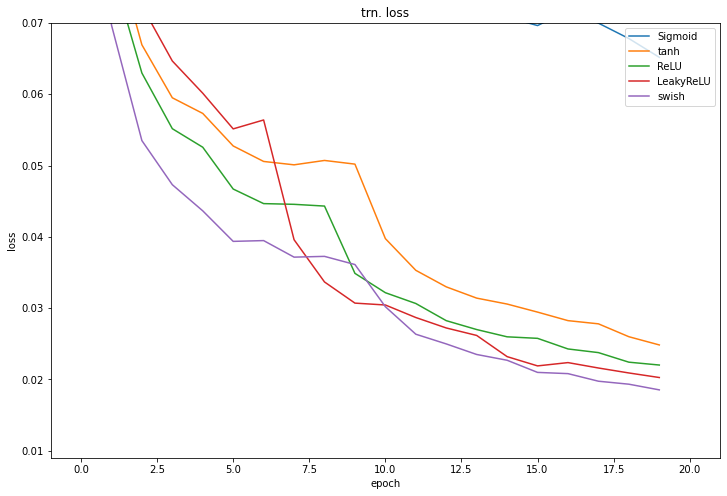

In [22]:
plot_history(hists, attribute='loss', axis=(-1,21,0.009,0.07), loc='upper right')